# Challenge

In [146]:
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [170]:
file = "/Users/alvaro/Documents/6TO SEMESTRE/Topologia/RETO RETO/Reto backup/Untitled 08-28-50-727/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl" #para correr en mac

#file = "C:/Users/guzma/OneDrive/Documents/TEC/S6/MA2007/Reto/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl"
df = pd.read_pickle(file)

## Data Cleaning

In [172]:
df["precipitation"] = df.pop("obs_pr")
df["temperature"] = df.pop("obs_tas")



In [173]:
length_42=[]
length_46=[]
i=0
for index,column in enumerate(df.keys()):
    print((index, column, len(df[column])))
    
    if len(df[column])== 21542:
        length_42.append(list(df.keys())[index])
    if len(df[column])== 21546:
        length_46.append(list(df.keys())[index])
    

(0, 'flow', 21542)
(1, 'flow_dates', 21542)
(2, 'obs_lon_lat', 2)
(3, 'obs_dates', 21546)
(4, 'precipitation', 21546)
(5, 'temperature', 21546)


In [179]:
df_list=[]
for name in df.keys(): 
    df_temp= pd.DataFrame(df[name])
    if df_temp.shape[1] ==1:
        df_temp.columns=[name]
    else: 
        columns=[]
        for index in range(df_temp.shape[1]):
             columns.append(name + "_" +str(index))
        df_temp.columns= columns
    df_list.append(df_temp)
    
df_dict= dict(zip(df.keys(), df_list))

In [181]:
df_dict.keys()

dict_keys(['flow', 'flow_dates', 'obs_lon_lat', 'obs_dates', 'precipitation', 'temperature'])

In [182]:
df_42= df_dict["flow"]
df_46= df_dict["temperature"]

for column in length_42:
    if column != "flow":
        df_42= pd.concat([df_42, df_dict[column].reset_index().drop("index", 1)], axis=1)
for column in length_46:
    if column != "temperature":
        df_46= pd.concat([df_46, df_dict[column].reset_index().drop("index", 1)], axis=1)

df_46=df_46.set_index("obs_dates")
df_42=df_42.set_index("flow_dates")
data= pd.concat([df_42, df_46], axis=1)
data = data.dropna(axis=0)
data.to_csv("data.csv", index=0)

data

/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_5745/2792048685.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_42= pd.concat([df_42, df_dict[column].reset_index().drop("index", 1)], axis=1)
/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_5745/2792048685.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_46= pd.concat([df_46, df_dict[column].reset_index().drop("index", 1)], axis=1)


,flow,temperature_0,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,precipitation_5,precipitation_6,precipitation_7,precipitation_8
1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1
1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5
1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7
1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0
2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1
2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0
2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6


## Clustering

Primero estaremos creando dos dataframes. Una tendra nuestra variable objetivo **flow** y la otra tendra las variables predictoras.

In [183]:
X = data.drop(['flow'], axis=1)
y = data['flow']

Ahora se tendra que reducir la dimension de nuestras variables predictoras. En este caso, tenemos 18 variables predictoras, lo cual nosotros reduciremos en dimensiones e intentaremos no perder mucho de la explicacion de estos datos al reducir dimensiones.

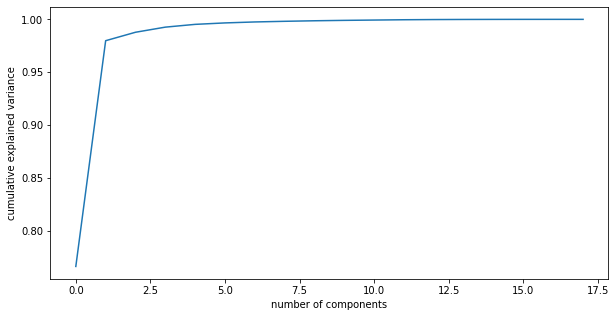

In [184]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Como podemos observar, al utilizar 2 componentes nosotros explicamos alrededor de 98% de los datos.

In [185]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(21178, 18)
(21178, 2)


Elbow para obtener noción de cuantos clusters utilizar

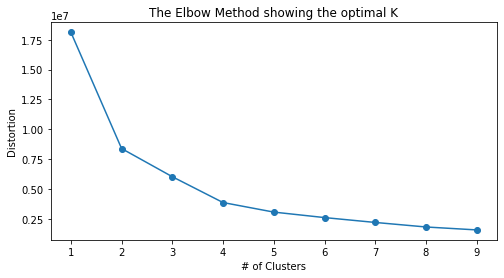

In [186]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(projected)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K, distortions, marker= "o")
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

K-Means

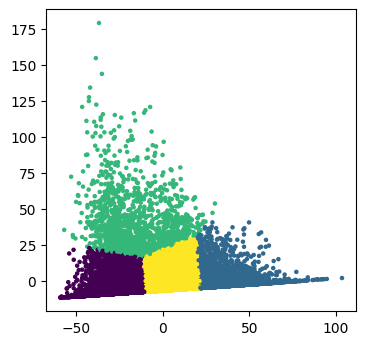

In [187]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(projected)
kmeans.labels_
center = kmeans.cluster_centers_
label = kmeans.fit_predict(projected)
u_labels = np.unique(label)
dam = pd.DataFrame(projected)
dam.shape
plt.figure(figsize=(4,4), dpi=100)
plt.scatter(projected[:,0], projected[:,1], c=kmeans.labels_, s=5)
plt.show()

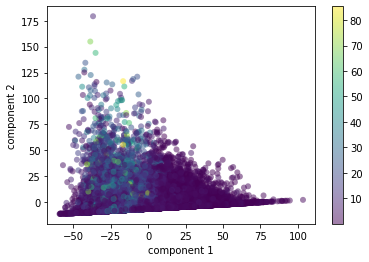

In [188]:
plt.scatter(projected[:, 0], projected[:, 1], c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [159]:

K = 4 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

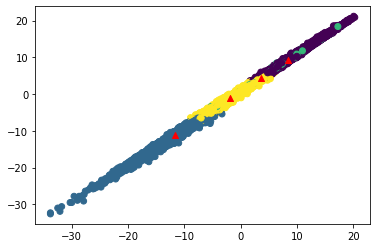

In [160]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

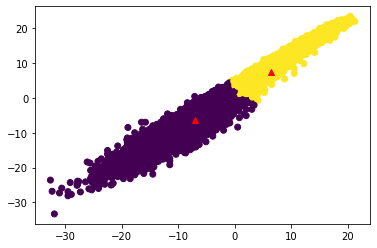

In [14]:
plt.scatter(X.iloc[:,1],X.iloc[:,2],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

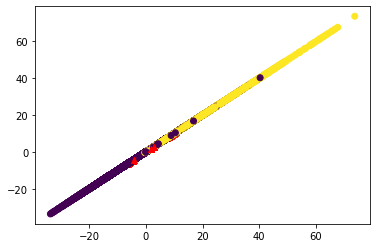

In [15]:
for i in range(len(X.columns)-1):
    plt.scatter(X.iloc[:,i+1],X.iloc[:,i+1],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i+1],centers[:,i+1],marker = '^', c = 'r')
plt.show()

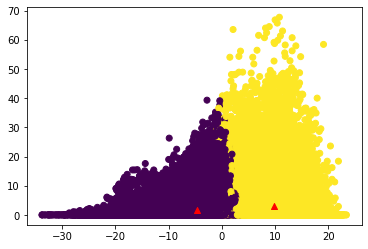

In [16]:
for i in range(8):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

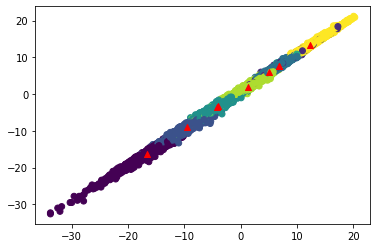

In [17]:
K = 9 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

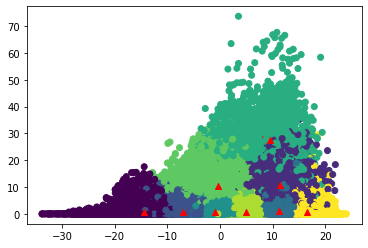

In [18]:
for i in range(9):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

## Observaciones sobre tiempo

In [19]:
Temp = X[['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7',
       'tas_8']]
Pres = X[['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7',
       'pr_8']]

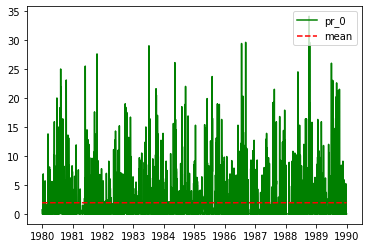

In [20]:
mean = [np.mean(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0])]*len(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')])
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

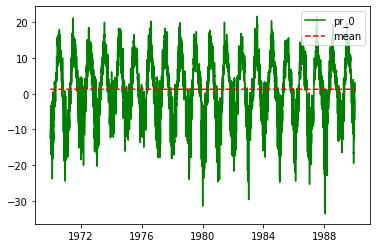

In [21]:
mean = [np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3])]*len(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')])
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3], color='g', label='pr_0', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

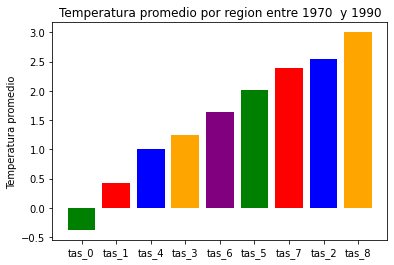

In [44]:
mean = []
for i in range(len(Temp.columns)):
    mean.append(np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),i]))

Temp_sorted = [x for _, x in sorted(zip(mean, Temp.columns))]
mean_sorted = sorted(mean)
plt.bar(Temp_sorted,mean_sorted,linestyle ='--', label='mean', color=['green','red','blue','orange','purple'])
plt.title("Temperatura promedio por region entre 1970  y 1990")
plt.ylabel('Temperatura promedio')
plt.show()

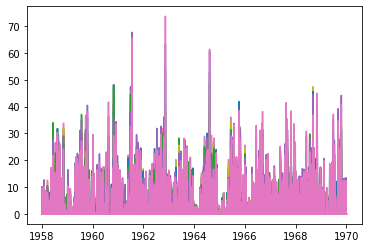

In [23]:
for i in range(len(Pres.columns)):
    # plt.plot(Pres.iloc[(Pres.index > '1970') & (Pres.index < '2010'),i], label=Pres.columns[i])
    plt.plot(Pres.iloc[(Pres.index < '1970'),i])
    plt.plot(np.mean(Pres.iloc[(Pres.index < '1970'),i]),'--')
    # plt.legend()
plt.show()

## Complejos Simpliciales

In [45]:
from sklearn.metrics import pairwise_distances

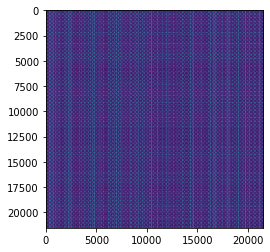

In [46]:
D = pairwise_distances(X)
plt.imshow(D)
plt.show()

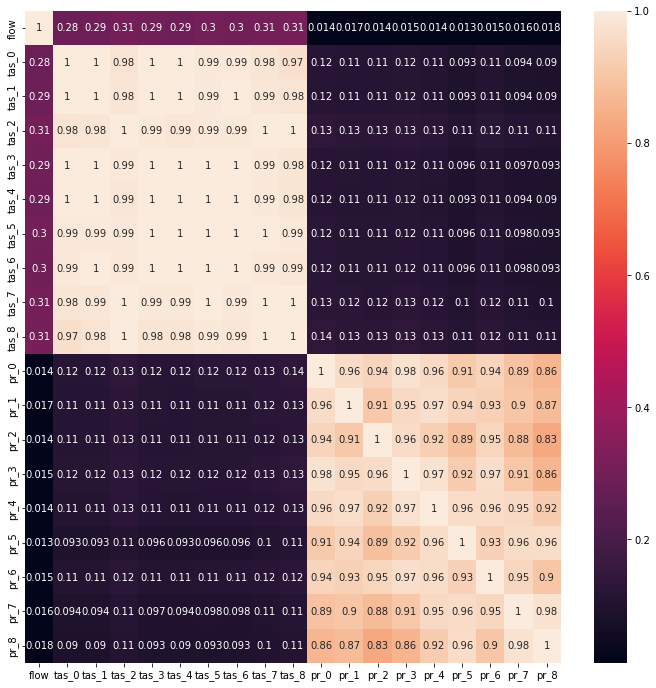

In [56]:
import seaborn as sns
plt.figure(figsize=(12, 12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

## TIME SERIES AND PERIODICITY